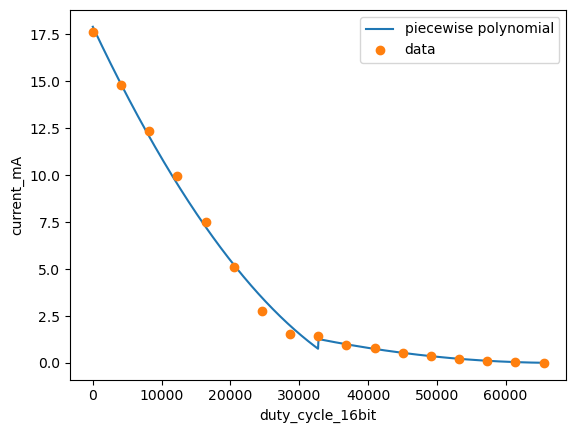

In [70]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import root

# Raw data
org_duty_cycle_16bit = np.array([
65520,
61425,
57330,
53235,
49140,
45045,
40950,
36855,
32760,
28665,
24570,
20475,
16380,
12285,
8190,
4095,
0
])

current_mA = np.array([
0.019,
0.042,
0.110,
0.207,
0.371,
0.521,
0.804,
0.963,
1.413,
1.522,
2.764,
5.116,
7.517,
9.930,
12.355,
14.780,
17.608
])

# Identify breakpoint
breakpoint = 32760

# Separate the data into two parts
mask = org_duty_cycle_16bit <= breakpoint
x1 = org_duty_cycle_16bit[mask]
y1 = current_mA[mask]
x2 = org_duty_cycle_16bit[~mask]
y2 = current_mA[~mask]

# Fit a 2nd degree polynomial to each part
p1 = np.polyfit(x1, y1, 2)
p2 = np.polyfit(x2, y2, 2)

# Create a function that uses the appropriate polynomial
def piecewise_poly(x, p1, p2, breakpoint):
    return np.where(x <= breakpoint, np.polyval(p1, x), np.polyval(p2, x))

# Plot the piecewise polynomial function
x = np.linspace(0, 65535, 1000)
y = piecewise_poly(x, p1, p2, breakpoint)
plt.plot(x, y, label='piecewise polynomial')
plt.plot(org_duty_cycle_16bit, current_mA, 'o', label='data')
plt.xlabel('duty_cycle_16bit')
plt.ylabel('current_mA')
plt.legend()
plt.show()



[ 8.57500435e-40 -2.49409276e-34  2.98212588e-29 -1.88006030e-24
  6.64912856e-20 -1.29414029e-15  1.27031015e-11 -4.70500855e-08
 -6.39152356e-04  1.76093249e+01]


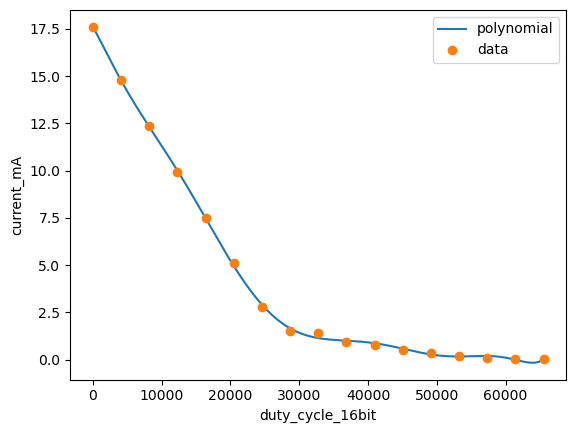

In [64]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import root

# Raw data
org_duty_cycle_16bit = np.array([
65520,
61425,
57330,
53235,
49140,
45045,
40950,
36855,
32760,
28665,
24570,
20475,
16380,
12285,
8190,
4095,
0
])

current_mA = np.array([
0.019,
0.042,
0.110,
0.207,
0.371,
0.521,
0.804,
0.963,
1.413,
1.522,
2.764,
5.116,
7.517,
9.930,
12.355,
14.780,
17.608
])

# we find the n-th order polynomial that fits the data
n = 9
p = np.polyfit(org_duty_cycle_16bit, current_mA, n)
print(p)

# plot the polynomial
x = np.linspace(0, 65535, 1000)
y = np.polyval(p, x)
plt.plot(x, y, label='polynomial')
plt.plot(org_duty_cycle_16bit, current_mA, 'o', label='data')
plt.xlabel('duty_cycle_16bit')
plt.ylabel('current_mA')
plt.legend()
plt.show()

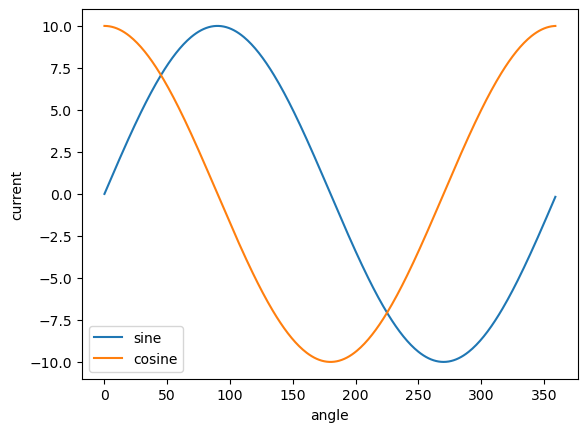

In [66]:
# each angel, has 2 currents associated with it, one for each coil (sine and cosine)
MaxCurrent = 10 # mA
Current = np.zeros((360, 2))
for i in range(360):
    Current[i][0] = MaxCurrent * np.sin(np.deg2rad(i))
    Current[i][1] = MaxCurrent * np.cos(np.deg2rad(i))

# plot the currents
plt.plot(Current[:, 0], label='sine')
plt.plot(Current[:, 1], label='cosine')
# plt.plot(np.arctan(Current[:, 1]/Current[:, 0]), label='arctan(cosine/sine)')
plt.xlabel('angle')
plt.ylabel('current')
plt.legend()
plt.show()

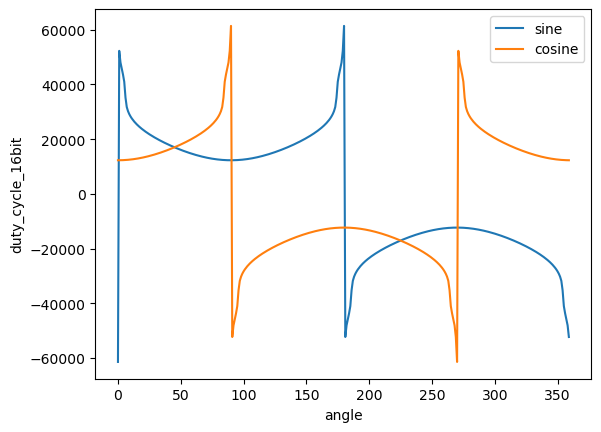

In [56]:
# initial guess for the duty cycle
# you might want to choose a more sensible initial guess
x0 = 0

# Now for each curent, we find the corosponding 16bit duty cycle (make it negative if it is negative)
duty_cycle_16bit = np.zeros((360, 2))
for i in range(360):
    for j in range(2):
        if Current[i][j] > 0:
            # define the function whose root we'll find
            func = lambda x: np.polyval(p, x) - Current[i][j]
            
            # find the root
            sol = root(func, x0)
            
            # ensure the solution has converged
            if sol.success:
                duty_cycle_16bit[i][j] = sol.x[0]
            else:
                print(f"Solution did not find converge for i={i}, j={j}")
        else:
            # define the function whose root we'll find
            func = lambda x: np.polyval(p, x) + Current[i][j]
            
            # find the root
            sol = root(func, x0)
            
            # ensure the solution has converged
            if sol.success:
                duty_cycle_16bit[i][j] = - sol.x[0]
            else:
                print(f"Solution did not find converge for i={i}, j={j}")

# plot the duty cycles
plt.plot(duty_cycle_16bit[:, 0], label='sine')
plt.plot(duty_cycle_16bit[:, 1], label='cosine')
plt.xlabel('angle')
plt.ylabel('duty_cycle_16bit')
plt.legend()
plt.show()

In [57]:
# now we print it a a C array on one line
print("const int duty_cycle_16bit[360][2] = {" , end='')
for i in range(360):
    print("{" + f"{int(duty_cycle_16bit[i][0])}, {int(duty_cycle_16bit[i][1])}" + "},", end='')
print("};")


const int duty_cycle_16bit[360][2] = {{-61393, 12302},{52284, 12304},{48037, 12312},{45788, 12325},{43638, 12343},{40986, 12366},{35189, 12395},{31765, 12428},{30235, 12467},{29166, 12510},{28318, 12559},{27601, 12613},{26972, 12671},{26408, 12735},{25893, 12803},{25416, 12876},{24971, 12954},{24552, 13037},{24155, 13125},{23778, 13217},{23417, 13313},{23071, 13414},{22737, 13520},{22416, 13629},{22105, 13744},{21803, 13862},{21510, 13985},{21226, 14111},{20948, 14242},{20678, 14377},{20414, 14516},{20156, 14658},{19903, 14804},{19656, 14955},{19414, 15109},{19177, 15266},{18945, 15427},{18717, 15592},{18493, 15760},{18274, 15932},{18058, 16108},{17847, 16287},{17639, 16469},{17435, 16655},{17235, 16845},{17038, 17038},{16845, 17235},{16655, 17435},{16469, 17639},{16287, 17847},{16108, 18058},{15932, 18274},{15760, 18493},{15592, 18717},{15427, 18945},{15266, 19177},{15109, 19414},{14955, 19656},{14804, 19903},{14658, 20156},{14516, 20414},{14377, 20678},{14242, 20948},{14111, 21226},{

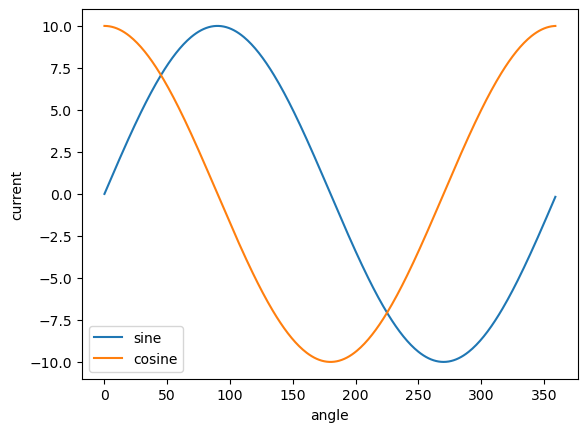

In [58]:
# now we are going to check this LUT by using it to generate a sine wave
# so for every degree, we will set the duty cycle to the value in the LUT, and then calculate the current with the p polynomial

calcCurrent = np.zeros((360, 2))
for i in range(360):
    for j in range(2):
        # calculate the current
        if duty_cycle_16bit[i][j] > 0:
            calcCurrent[i][j] = np.polyval(p, duty_cycle_16bit[i][j])
        else:
            calcCurrent[i][j] = - np.polyval(p, - duty_cycle_16bit[i][j])

# plot the currents
plt.plot(calcCurrent[:, 0], label='sine')
plt.plot(calcCurrent[:, 1], label='cosine')
# # also plot the original currents
# plt.plot(Current[:, 0], label='sine original')
# plt.plot(Current[:, 1], label='cosine original')
plt.xlabel('angle')
plt.ylabel('current')
plt.legend()
plt.show()